# LightGBM Classification Solutions

![Namespace Labs](../../../../labs.png)

## Churn Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in churn.csv
df = pd.read_csv("churn.csv")

In [3]:
# check the head of the loaded dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


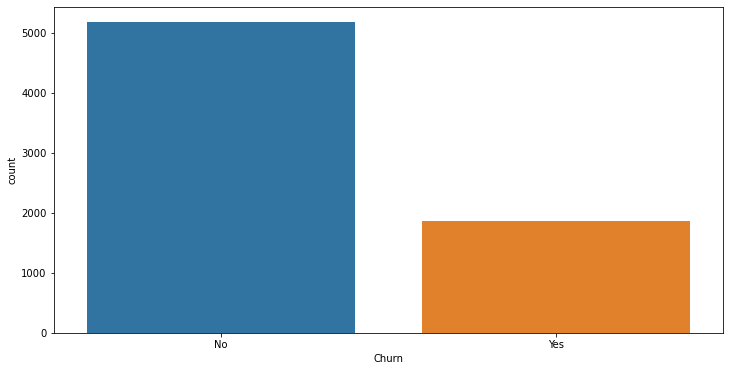

In [4]:
# Plot the graph below
plt.figure(figsize=(12,6))

sns.countplot(x='Churn',data=df)

In [5]:
# Create a dataframe called cat_feats
# It should contain all the categorical features of the 
# Data Frame
cat_feats = ['Partner','gender','SeniorCitizen','Dependents','PhoneService','MultipleLines',
             'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod' ]

In [6]:
# Convert Churn into a dummy variable
df = pd.get_dummies(df,columns = ['Churn'],drop_first=True)

In [7]:
# Convert the categories into integers
# Display the head of the converted dataframe
from category_encoders import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(cols=cat_feats, handle_missing='return_nan')

df = ordinal_encoder.fit_transform(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,29.85,29.85,0
1,5575-GNVDE,2.0,1.0,2.0,1.0,34,2.0,2.0,1.0,2.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,56.95,1889.50,0
2,3668-QPYBK,2.0,1.0,2.0,1.0,2,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,53.85,108.15,1
3,7795-CFOCW,2.0,1.0,2.0,1.0,45,1.0,1.0,1.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,3.0,42.30,1840.75,0
4,9237-HQITU,1.0,1.0,2.0,1.0,2,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70.70,151.65,1


In [8]:
# Create the X variable
X = df.drop(['customerID','Churn_Yes'],axis=1)

In [9]:
# Create the y variable
y = df['Churn_Yes']

In [10]:
# Split the data into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [11]:
# Import LGBMClassifier
from lightgbm import LGBMClassifier

In [12]:
# Create an instance of LGBMClassifier
model = LGBMClassifier()

In [13]:
# Fit the data to the training set
model.fit(X_train,y_train)    

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
# Make predctions
# Store the predictions in a variable
predictions = model.predict(X_test)

In [15]:
# import the common classification metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [16]:
# Check the model's accuracy
accuracy_score(predictions, y_test)

0.7818267865593942

In [17]:
# Print the confusion Matrix
confusion_matrix(predictions, y_test)

array([[1369,  267],
       [ 194,  283]])

In [18]:
# Plot the confussion matrix
from sklearn.metrics import plot_confusion_matrix

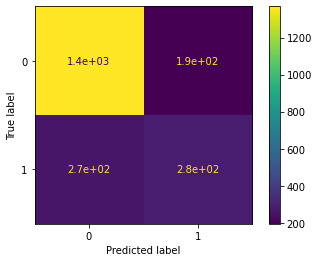

In [19]:
plot_confusion_matrix(model,X_test,y_test)

In [20]:
# Print the classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1636
           1       0.51      0.59      0.55       477

    accuracy                           0.78      2113
   macro avg       0.70      0.72      0.70      2113
weighted avg       0.79      0.78      0.79      2113



Happy Coding!